<a href="https://colab.research.google.com/github/saima8/Burger-Bari/blob/main/Keras_Syntax_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('/content/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


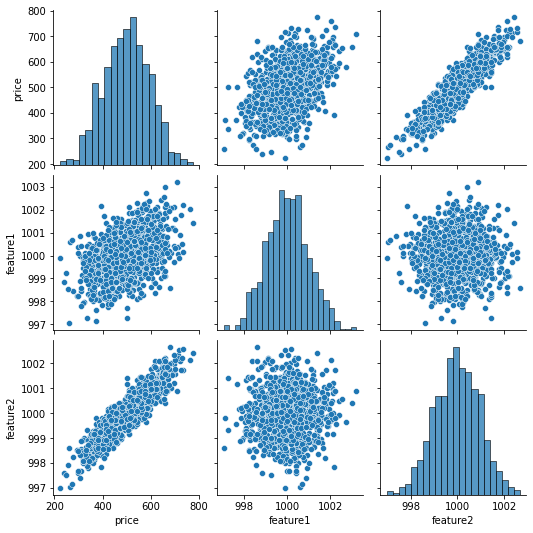

In [3]:
sns.pairplot(df)

In [4]:
from sklearn.model_selection import train_test_split

X = df[['feature1', 'feature2']].values
y = df['price'].values

In [5]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [7]:
X_train.shape

(670, 2)

In [8]:
X_test.shape

(330, 2)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
print(X_train.max())
print(X_train.min())

1.0
0.0


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
# help(Sequential)

In [15]:
# model = Sequential([Dense(4,activation='relu'), Dense(2, activation='relu'), Dense(1)])

In [16]:
#Alternate way 

model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [17]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 1s 1ms/step - loss: 256481.2344
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 256320.9375
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 256160.4062
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 255985.9531
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 255791.4062
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 255574.0469
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 255328.2656
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 255055.6406
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 254752.8281
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 254416.8594
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 254044.7812
Epoch 12/250
21/21 [==============================] - 0s 2ms/st

In [18]:
loss_df = pd.DataFrame(model.history.history)
#loss history

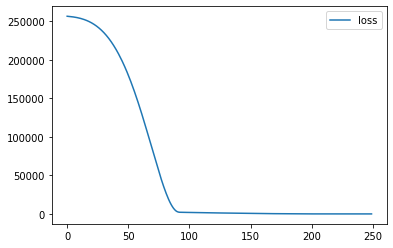

In [19]:
loss_df.plot()

In [20]:
model.evaluate(X_test, y_test, verbose=0)
#mean squarred error, models loss on test sets

24.28278350830078

In [21]:
model.evaluate(X_train, y_train, verbose=0)

24.06178855895996

In [27]:
test_predictions = model.predict(X_test)
test_predictions

array([[405.42657],
       [623.62787],
       [592.2289 ],
       [572.3217 ],
       [366.75397],
       [579.27637],
       [515.15735],
       [459.2358 ],
       [549.34595],
       [447.6512 ],
       [611.87695],
       [549.0588 ],
       [419.23315],
       [409.00406],
       [651.3326 ],
       [437.43146],
       [508.57306],
       [660.0051 ],
       [662.6604 ],
       [565.64215],
       [334.3763 ],
       [444.9616 ],
       [382.66547],
       [378.8983 ],
       [566.6958 ],
       [610.6794 ],
       [532.4984 ],
       [427.99307],
       [655.52094],
       [414.2198 ],
       [442.76813],
       [485.24734],
       [438.5447 ],
       [681.9203 ],
       [424.89594],
       [417.8172 ],
       [502.05173],
       [550.581  ],
       [509.84125],
       [395.48883],
       [618.6828 ],
       [416.76538],
       [604.5438 ],
       [446.0938 ],
       [502.10464],
       [581.82275],
       [669.08624],
       [490.52432],
       [318.7391 ],
       [485.54596],


In [28]:
test_predictions = pd.Series(test_predictions.reshape(330,))


In [29]:
test_predictions.shape

(330,)

**Choosing an optimizer and loss**

keep in mind what kind of problem you are trying to solve:

# For a multi-class classification problem
model.compile(optimizer= 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy')

# For a binary classification problem
model.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['accuracy')

# For a mean squarred regression problem
model.compile(optimizer= 'rmsprop', loss='mse')

In [30]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [31]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [33]:
pred_df.columns = ['Test True Y', 'Model Predictions']

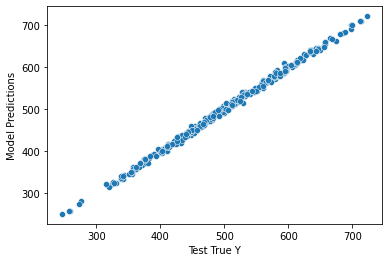

In [35]:
sns.scatterplot(x= 'Test True Y',y = 'Model Predictions',data = pred_df)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

3.94801392227453

In [40]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [41]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

24.282770179007215

In [42]:
new_gem = [[998, 1000]]

In [44]:
new_gem = scaler.transform(new_gem)

In [45]:
model.predict(new_gem)

array([[419.81284]], dtype=float32)

In [46]:
#To save a complex model
from tensorflow.keras.models import load_model

In [47]:
model.save('my_gem_model.h5')

In [48]:
later_model = load_model('my_gem_model.h5')

In [49]:
later_model.predict(new_gem)

array([[419.81284]], dtype=float32)